In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [27]:
track_data = pd.read_csv("tracks_features.csv")


In [28]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [29]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,1999


In [30]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "tempo":"Tempo", "duration_ms":"Duration(m/s)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration(m/s),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,1999


The coorelation between Danceability and Tempo is (0.06058986844238374, 0.0).
The r-value is: 0.0036711321578653438


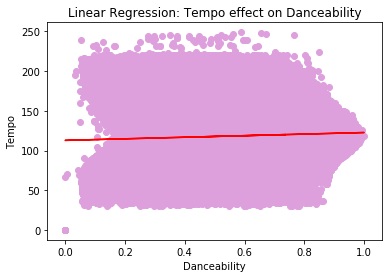

In [38]:
#tempo analysis
tempo_coorelation = (st.pearsonr(renamed_track_data_columns["Danceability"], renamed_track_data_columns["Tempo"]))
print(f'The coorelation between Danceability and Tempo is {tempo_coorelation}.')

linear_regression = st.linregress(renamed_track_data_columns["Danceability"], renamed_track_data_columns["Tempo"])
linear_regression

x_values = renamed_track_data_columns["Danceability"]
y_values = renamed_track_data_columns["Tempo"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="plum")
plt.plot(x_values, regress_values, "r-")
#plt.annotate(line_eq,(-35,285), fontsize=20, color="navy")
plt.xlabel("Danceability")
plt.ylabel("Tempo")
plt.title("Linear Regression: Tempo effect on Danceability")


print(f"The r-value is: {rvalue**2}")
plt.show()